[View in Colaboratory](https://colab.research.google.com/github/vneogi199/Dogs_Gone_Sideways/blob/master/Dogs_Gone_Sideways.ipynb)

>[Specifying and Compiiling the Model](#folderId=1PzRdAVEwlaKYiKxIM_nxuEdBPbk-6dmi&updateTitle=true&scrollTo=st06f2UHJCFg)

>[Data augmentation and fitting the model](#folderId=1PzRdAVEwlaKYiKxIM_nxuEdBPbk-6dmi&updateTitle=true&scrollTo=2wduWhvlI8uQ)

>[Saving compiled model](#folderId=1PzRdAVEwlaKYiKxIM_nxuEdBPbk-6dmi&updateTitle=true&scrollTo=uNMaJ8skI2rC)

>[Predicting results on validation data and visualizing the results](#folderId=1PzRdAVEwlaKYiKxIM_nxuEdBPbk-6dmi&updateTitle=true&scrollTo=h_ruyvbTIwYO)

>[Model Accuracy and Confusion Matrix](#folderId=1PzRdAVEwlaKYiKxIM_nxuEdBPbk-6dmi&updateTitle=true&scrollTo=5URbhpnuInlQ)



In [0]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Specifying and Compiiling the Model

In [0]:
num_classes = 2
weights_file = 'drive/Dogs_Gone_Sideways/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights=weights_file))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and fitting the model

In [104]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224


data_generator_with_aug = ImageDataGenerator(
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2)
            
data_generator_no_aug = ImageDataGenerator()


train_generator = data_generator_with_aug.flow_from_directory(
       directory = 'drive/Dogs_Gone_Sideways/images/train',
       target_size=(image_size, image_size),
       batch_size=12,
       class_mode='categorical')


validation_generator = data_generator_no_aug.flow_from_directory(
       directory = 'drive/Dogs_Gone_Sideways/images/val',
       target_size=(image_size, image_size),
       class_mode='categorical',
       shuffle=False)


model.fit_generator(
       train_generator, # specify where model gets training data
       epochs = 3,
       steps_per_epoch=19,
       validation_data=validation_generator) # specify where model gets validation data


Found 252 images belonging to 2 classes.
Found 264 images belonging to 2 classes.
Epoch 1/3
19/19 [==============================] - 9s 494ms/step - loss: 0.5856 - acc: 0.7018 - val_loss: 0.2934 - val_acc: 0.8864
Epoch 2/3
19/19 [==============================] - 7s 390ms/step - loss: 0.2872 - acc: 0.9035 - val_loss: 0.2355 - val_acc: 0.9205
Epoch 3/3
19/19 [==============================] - 7s 373ms/step - loss: 0.1458 - acc: 0.9693 - val_loss: 0.1688 - val_acc: 0.9432


# Saving compiled model

In [0]:
model.save('drive/Dogs_Gone_Sideways/Dogs_Gone_Sideways_Model.h5')


# Predicting results on validation data and visualizing the results

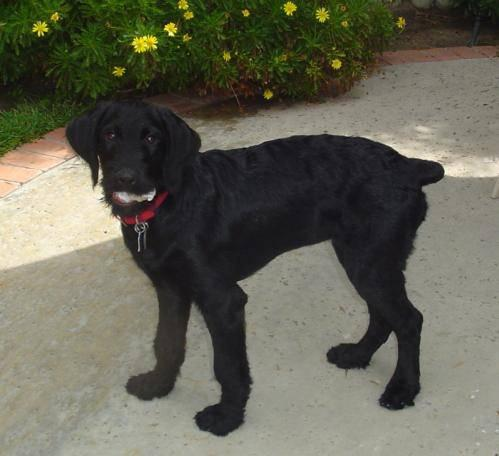

Predicted as: Upright

 



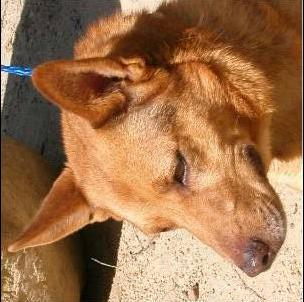

Predicted as: Sideways

 



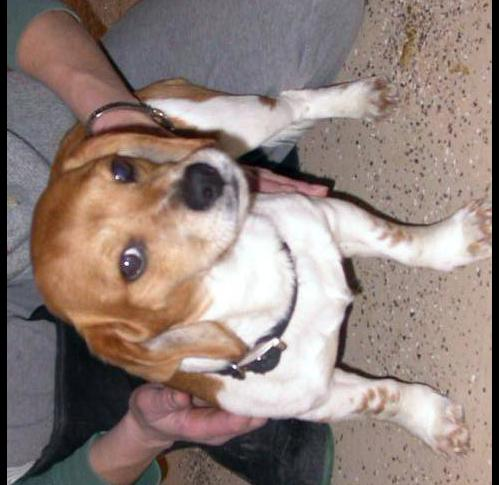

Predicted as: Sideways

 



In [106]:
import numpy as np
result = np.round(model.predict_generator(validation_generator))


# import random
test_files = []
test_res = []
for i in range(0, 3):
  rng = random.randint(0, len(validation_generator.filenames))
  test_files.append('drive/Dogs_Gone_Sideways/images/val/' +  validation_generator.filenames[rng])
  if(result[rng,1]==0):
    test_res.append("Sideways")
  else:
    test_res.append("Upright")
  

from IPython.display import Image, display
for i in range(0, 3):
  display(Image(test_files[i]))
  print("Predicted as: " + str(test_res[i]))
  print("\n \n")

# Model Accuracy and Confusion Matrix

In [107]:
print("Model Accuracy on validation set = " + str(model.evaluate_generator(validation_generator)[1]))
print("\n \n")

from sklearn.metrics import confusion_matrix

y_true = validation_generator.classes
y_pred = result[:,1] > 0.5


print("Confusion Matrix:  ")
confusion_matrix(y_true, y_pred)

Model Accuracy on validation set = 0.9431818181818182

 

Confusion Matrix:  


array([[124,   8],
       [  7, 125]])